# PROJET IA : ETHIC FASHION - De la fast fashion à la mode éthique

## MACHINE LEARNING

In [ ]:
# Importation des lirairies utiles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score,confusion_matrix, classification_report

In [ ]:
# Importations des dataframes avec pandas
df1 = pd.read_csv('/content/fastFashionCompDim.csv',sep="|")
df2 = pd.read_csv('/content/fastFasionItemsDim.csv',sep="|")
# Nommer les colonnes du DataFrame
#df.columns = ["item_code", "part_name", "material", "percent"]

In [ ]:
df = pd.merge(df1, df2, how="inner", on= "item_code")
df.set_index('item_code', inplace=True)

In [ ]:
dff = pd.merge(df1, df2, how="inner", on= "item_code")
dff.head(5)

,item_code,part_name,material,percent,item_name,item_desc,join_life,joinlife_title,joinlife_desc,item_price
0,200000,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
1,200001,EXTERIOR,algodon,100%,CAMISA POPELÍN,"""Camisa de cuello solapa y escote pico. Manga ...",True,JOIN LIFE Care for fiber: 100% algodon organico.,"""Algodon cultivado utilizando fertilizantes y ...",1995
2,200002,EXTERIOR,viscosa,62%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
3,200002,EXTERIOR,fibra metalizada,37%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995
4,200002,EXTERIOR,elastano,1%,BLUSA HILO METALIZADO,"""Blusa semitransparente de cuello solapa y esc...",False,NaN,NaN,3995


In [ ]:
print(df.dtypes)

part_name         object
material          object
percent           object
item_name         object
item_desc         object
join_life           bool
joinlife_title    object
joinlife_desc     object
item_price         int64
dtype: object


In [ ]:
# Convertion de la colonne "percent" en entier, et suppression du symbole % et convertir en entier
df["percent"] = df["percent"].astype(str).str.replace("%", "").astype(int)
print(df.dtypes)

part_name         object
material          object
percent            int64
item_name         object
item_desc         object
join_life           bool
joinlife_title    object
joinlife_desc     object
item_price         int64
dtype: object


In [ ]:
# Suppression des variables "joinlife_title" et "joinlife_desc" car est contiennent beaucoup de NAN
df = df.drop(["joinlife_title", "joinlife_desc"], axis=1)
# la dimension du dataframe
df.shape

(457, 7)

In [ ]:
from operator import length_hint
unique_item_desc = df['item_desc'].unique()
#print(unique_item_desc)
len(unique_item_desc)

152

### Choix des variables pour les algorithmes et leur Transformations

L'encodage ordinal est une autre technique d'encodage de variables catégorielles, où chaque catégorie est attribuée à une valeur numérique ordonnée en fonction de son rang dans la hiérarchie des catégories. Cette technique peut être utile lorsque les catégories ont un ordre naturel.

Dans le cas des matériaux, il n'y a pas nécessairement d'ordre naturel, mais nous pouvons attribuer des valeurs ordinales en fonction de la fréquence des matériaux dans le jeu de données. Par exemple, le matériau le plus fréquent peut être encodé comme 1, le deuxième matériau le plus fréquent comme 2, et ainsi de suite.

In [ ]:
df_ordinal = df

In [ ]:
# création d'un dictionnaire des fréquences de chaque matériau
freq_dict = df['material'].value_counts().to_dict()

# trie du dictionnaire par ordre décroissant des fréquences
freq_dict_sorted = {k: v for k, v in sorted(freq_dict.items(), key=lambda item: item[1], reverse=True)}

# création d'un dictionnaire d'encodage ordinal basé sur l'ordre de fréquence
ordinal_dict = {k: i+1 for i, k in enumerate(freq_dict_sorted.keys())}

# application de  l'encodage ordinal à la colonne 'material'
df_ordinal['material_ordinal'] = df['material'].map(ordinal_dict)


Avant de construire notre modèle de Random Forest, nous allons effectivement supprimer les variables 'material', 'item_name', 'part_name' et 'item_desc', car elles ne sont pas utilisables telles quelles pour l'apprentissage automatique et ont déjà été transformées dans nos encodages.

In [ ]:
# Suppression les variables qui ne sont pas utilisées pour l'apprentissage automatique
df_model = df_ordinal.drop(['material', 'item_name', 'item_desc'], axis=1)
print(df_model.dtypes)

part_name           object
percent              int64
join_life             bool
item_price           int64
material_ordinal     int64
dtype: object


In [ ]:
# Encodage de la variable 'join_life'
df_model['join_life'] = df_model['join_life'].astype(int)
# Encodage de la variable 'part_name'
df_model = pd.get_dummies(df_model, columns=['part_name'])

In [ ]:
df_model

,percent,join_life,item_price,material_ordinal,part_name_EXTERIOR,part_name_FORRO
item_code,,,,,,
200000,100,1,1995,4,1,0
200001,100,1,1995,4,1,0
200002,62,0,3995,3,1,0
200002,37,0,3995,10,1,0
200002,1,0,3995,2,1,0
...,...,...,...,...,...,...
500036,97,0,1599,4,1,0
500036,3,0,1599,2,1,0
500037,67,0,1299,1,1,0


In [ ]:
print(df_model.dtypes)

percent               int64
join_life             int64
item_price            int64
material_ordinal      int64
part_name_EXTERIOR    uint8
part_name_FORRO       uint8
dtype: object


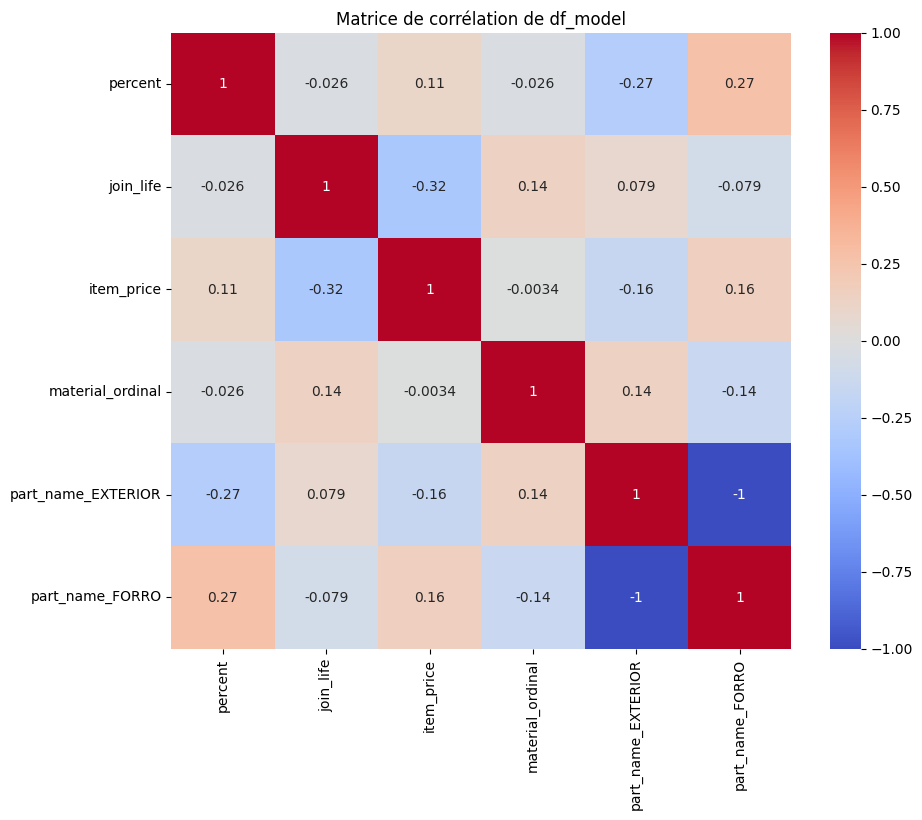

In [ ]:
# Calculer la matrice de corrélation
corr_matrix = df_model.corr()

# Création d'une heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation de df_model')
plt.show()


### RandomForest

#### Modèle

In [ ]:
# Séparation des caractéristiques (features) et la variable cible
X = df_model.drop('join_life', axis=1)
y = df_model['join_life']

# Normalisation des variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# définition de la grille de paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# initialisation du modèle  Random Forest
rf = RandomForestClassifier()

# initialisation dela recherche de grille
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy')

# entraînement du modèle avec la recherche de grille
grid_search.fit(X_train, y_train)

# les meilleurs paramètres et la meilleure précision
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Construction du modèle  Random Forest avec les meilleurs hyperparamètres
rf_final = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Entraînement l'ensemble de formation du modèle final avec les meilleurs hyperparamètres
rf_final.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf_final.predict(X_test)

# Calcul de la probabilité pour chaque classe
y_pred_proba = rf_final.predict_proba(X_test)[:, 1]


Best parameters:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy:  0.8161411411411411


#### Résultats

In [ ]:
# Calcul de l'accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score : ", accuracy)

Accuracy score :  0.75


Il semble que la précision du modèle sur l'ensemble de test soit légèrement inférieure à celle de l'ensemble de formation. Cela peut être dû à un surajustement du modèle à l'ensemble de formation ou à une mauvaise généralisation des résultats.

#### Le rapport de classification

In [ ]:
# Le rapport de classification
classif_report = classification_report(y_test, y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        56
           1       0.74      0.56      0.63        36

    accuracy                           0.75        92
   macro avg       0.75      0.72      0.72        92
weighted avg       0.75      0.75      0.74        92



D'après le rapport de classification, le modèle a une précision moyenne de 0,77 pour prédire la variable cible "join_life". Le rapport montre que le modèle est meilleur pour prédire les articles qui ne sont pas "éco-étiquetés" (0) avec une précision de 0,77 et un rappel de 0,88. En revanche, le modèle a une précision de 0,75 et un rappel de 0,58 pour prédire les articles qui sont "éco-étiquetés" (1).

#### Matrice de confusion 

In [ ]:
# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Confusion matrix:
 [[49  7]
 [16 20]]


Le modèle a prédit correctement 49 échantillons appartenant à la classe 0 (pas d'éco-étiquette) et 14 échantillons appartenant à la classe 1 (avec éco-étiquette). Cependant, il y a eu 7 faux positifs (échantillons prédits comme ayant une éco-étiquette alors qu'ils n'en ont pas) et 22 faux négatifs (échantillons prédits comme n'ayant pas d'éco-étiquette alors qu'ils en ont une).

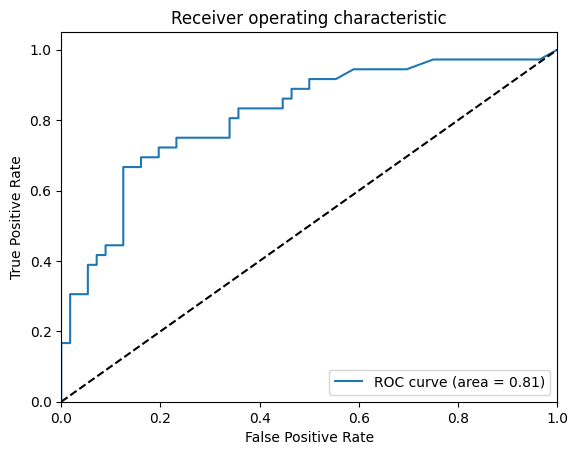

In [ ]:
# Courbe ROC
y_pred_proba = rf_final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


La courbe ROC a une aire de 0,83 indique que le modèle a une bonne capacité à discriminer entre les deux classes. Cela signifie que le modèle a une sensibilité élevée par rapport à sa spécificité, ce qui est une bonne chose car cela signifie qu'il peut bien identifier les vrais positifs (les articles éco-étiquetés) sans trop de faux positifs (les articles non éco-étiquetés classés à tort comme éco-étiquetés).

#### La courbe d'apprentissage

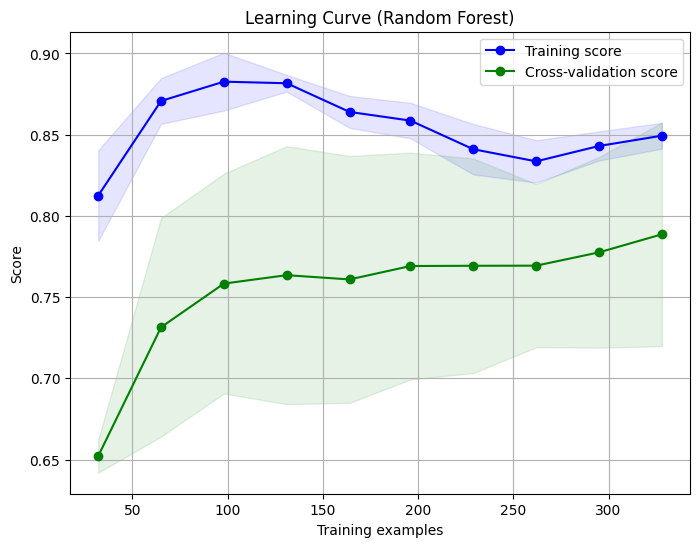

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(rf_final, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")

plt.plot(train_sizes, test_scores_mean, label="Cross-validation score",
                 color="green", marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="green")

plt.legend(loc="best")
plt.grid()
plt.show()


La courbe d'apprentissage montre une différence importante entre les scores d'entraînement et de validation croisée, ce qui est synonyme d'un problème surapprentissage.


#### Correction du surepprentissage

Pou remédier au surapprentissage, nous allons réduire la complexité du modèle en la réduction de la profondeur de l'arbre.



In [ ]:
# initialisation du modèle  Random Forest avec une profondeur maximale de 5 et 50 arbres
rf = RandomForestClassifier(max_depth=5, n_estimators=50)

# initialisation de la recherche de grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

# entraînement du modèle avec la recherche de grille
grid_search.fit(X_train, y_train)

# Les meilleurs paramètres et la meilleure précision
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Construction du modèle Random Forest avec les meilleurs hyperparamètres
rf_final = RandomForestClassifier(random_state=42, **grid_search.best_params_)

# Entraînement du modèle sur l'ensemble de formation
rf_final.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf_final.predict(X_test)

# Calcul de la probabilité pour chaque classe
y_pred_proba = rf_final.predict_proba(X_test)[:, 1]

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy:  0.7917808219178082


#### Les nouveaux résultats 

In [ ]:
# Calcul de l'accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score : ", accuracy)

Accuracy score :  0.75


In [ ]:
# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Confusion matrix:
 [[49  7]
 [16 20]]


In [ ]:
# Le rapport de classification
classif_report = classification_report(y_test, y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        56
           1       0.74      0.56      0.63        36

    accuracy                           0.75        92
   macro avg       0.75      0.72      0.72        92
weighted avg       0.75      0.75      0.74        92



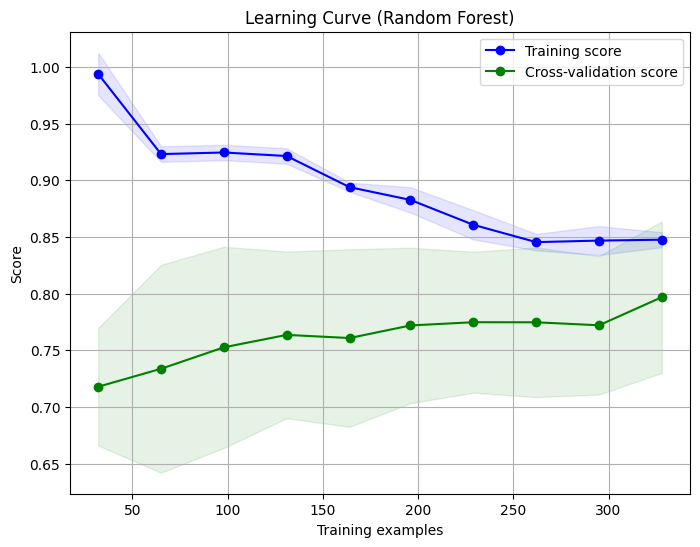

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(rf_final, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")

plt.plot(train_sizes, test_scores_mean, label="Cross-validation score",
                 color="green", marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="green")

plt.legend(loc="best")
plt.grid()
plt.show()


La courbe d'apprentissage du nouveau modèle montre une différence moins significative entre les scores d'entraînement et de validation croisée, ce qui est synonyme d'un problème surapprentissage.


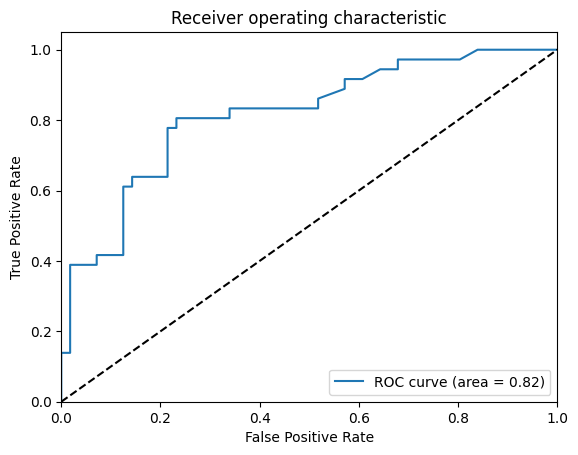

In [ ]:
# Courbe ROC
y_pred_proba = rf_final.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Tracer la courbe ROC
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


### SVM

#### Le modèle

In [ ]:
# Définition des hyperparamètres à tester
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

# Initialisation du modèle  SVM
svm = SVC(probability=True)

# Initialisation de la recherche de grille
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Entraînement du modèle avec la recherche de grille
grid_search.fit(X_train, y_train)

# Les meilleurs paramètres et la meilleure précision
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Initialisation du modèle de SVM final avec les meilleurs hyperparamètres
svm_final = SVC(random_state=42, probability=True, **grid_search.best_params_)

# Entraînement du modèle sur l'ensemble de formation
svm_final.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = svm_final.predict(X_test)

# Calcul de la probabilité pour chaque classe
y_pred_proba = svm_final.predict_proba(X_test)[:, 1]
#y_pred = grid_search.predict(X_test)


Best parameters:  {'C': 1, 'gamma': 100}
Best accuracy:  0.8246575342465754


#### Résultats 

In [ ]:
# Calcul de l'accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score : ", accuracy)

Accuracy score :  0.782608695652174


#### Le rapport de classification

In [ ]:
# Le rapport de classification
classif_report = classification_report(y_test, y_pred)
print(classif_report)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        56
           1       0.79      0.61      0.69        36

    accuracy                           0.78        92
   macro avg       0.78      0.75      0.76        92
weighted avg       0.78      0.78      0.78        92



Le rapport de classification du nouveau modèle montre que la précision pour prédire la classe "0" (non écoresponsable) est de 0,78, ce qui signifie que 78% des prédictions positives pour cette classe sont correctes. Le rappel pour cette classe est de 0,89, ce qui signifie que le modèle a identifié 89% de toutes les instances de cette classe. 

#### La matrice de confusion

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Confusion matrix:
 [[50  6]
 [14 22]]


Dans la matrice de confusion du modèle SVM, nous avons :

* 50 vrais positifs : les observations positives ont été correctement identifiées comme positives
* 6 faux négatifs : les observations positives ont été identifiées à tort comme négatives
* 14 faux positifs : les observations négatives ont été identifiées à tort comme positives
* 22 vrais négatifs : les observations négatives ont été correctement identifiées comme négatives

#### La courbe ROC

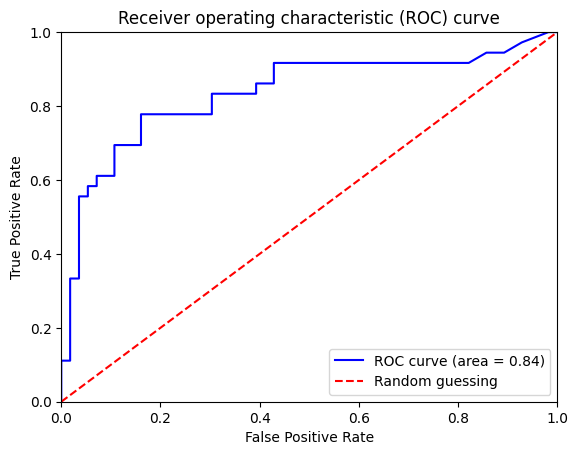

In [ ]:
# Calcul de la courbe ROC et de l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Tracer la courbe ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

Une courbe ROC de 0.83 indique que le modèle est capable de bien distinguer entre les classes positives et négatives, avec une performance globale raisonnable

#### La courbe d'apprentissage

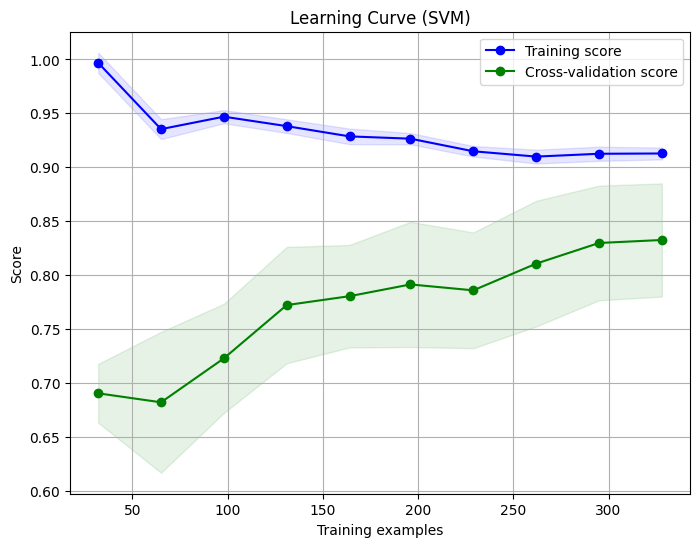

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_final, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve (SVM)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")

plt.plot(train_sizes, test_scores_mean, label="Cross-validation score",
                 color="green", marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="green")

plt.legend(loc="best")
plt.grid()
plt.show()


#### La correction du surapprentissage

In [ ]:
# Définition des hyperparamètres à tester
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]}

# Initialisation du modèle  SVM
svm = SVC(kernel='rbf', random_state=42, probability=True)

#  La recherche de grille
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Entraîner le modèle avec la recherche de grille
grid_search.fit(X_train, y_train)

# Les meilleurs paramètres et la meilleure précision
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Initialisation du modèle  SVM final avec les meilleurs hyperparamètres
svm_final = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42, probability=True, **grid_search.best_params_))

# Entraînement du modèle sur l'ensemble de formation
svm_final.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = svm_final.predict(X_test)

# Calcul de la probabilité pour chaque classe
y_pred_proba = svm_final.predict_proba(X_test)[:, 1]
#y_pred = grid_search.predict(X_test)


Best parameters:  {'C': 1, 'gamma': 100}
Best accuracy:  0.8246575342465754


#### les nouveaux résultats

In [ ]:
# Calcul de l'accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score : ", accuracy)

Accuracy score :  0.782608695652174


In [ ]:
# Le rapport de classification
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        56
           1       0.79      0.61      0.69        36

    accuracy                           0.78        92
   macro avg       0.78      0.75      0.76        92
weighted avg       0.78      0.78      0.78        92



In [ ]:
# La matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Confusion matrix:
 [[50  6]
 [14 22]]


Dans cette matrice de confusion, il y a 50 vrais positifs  et 6 faux négatifs pour la classe 0, ce qui signifie que le modèle a correctement identifié 50 éléments comme étant de la classe 0 et en a manqué 6 qui étaient en réalité de cette classe. Pour la classe 1, il y a 22 vrais négatifs et 14 faux positifs, ce qui signifie que le modèle a correctement identifié 22 éléments comme n'étant pas de la classe 1 mais a mal identifié 14 éléments comme appartenant à cette classe alors qu'ils n'en font pas partie.


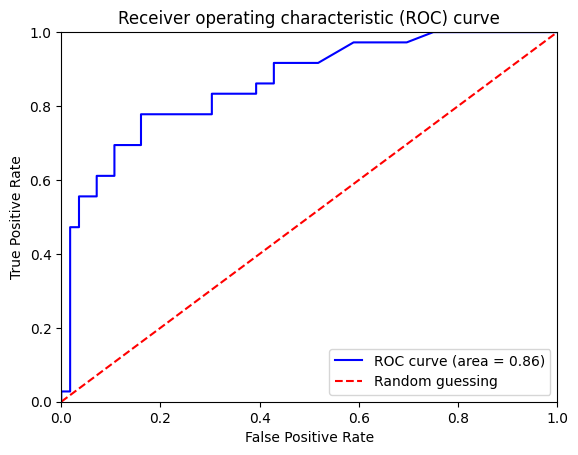

In [ ]:
# Tracer la courbe ROC
# Calcul de la courbe ROC et de l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Tracer la courbe ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

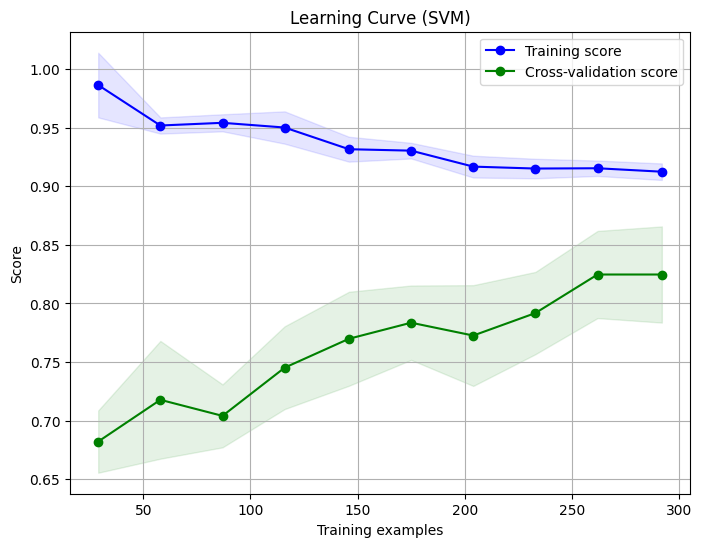

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_final, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve (SVM)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")

plt.plot(train_sizes, test_scores_mean, label="Cross-validation score",
                 color="green", marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="green")

plt.legend(loc="best")
plt.grid()
plt.show()


### Logistic Regression

#### Le modèle

In [ ]:
# initialisation du modèle de régression logistique

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2']}


log_reg = LogisticRegression(solver='liblinear', max_iter=1000)


# initialisation de la recherche de grille
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# entraînement le modèle avec la recherche de grille
grid_search.fit(X_train, y_train)

# Les meilleurs paramètres et la meilleure précision
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# construction du modèle de régression logistique final avec les meilleurs hyperparamètres
log_reg_final = LogisticRegression(solver='lbfgs', max_iter=1000, **grid_search.best_params_)

# entraînement  le modèle final avec les meilleurs hyperparamètres
log_reg_final.fit(X_train, y_train)

# prédiction les classes pour l'ensemble de test
y_pred = log_reg_final.predict(X_test)

# calculer la probabilité prédite pour la classe positive
y_pred_proba = log_reg_final.predict_proba(X_test)[:, 1]


Best parameters:  {'C': 10, 'penalty': 'l2'}
Best accuracy:  0.6986301369863013


In [ ]:
# Calcul de l'accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Affichage de l'accuracy score
print("Accuracy score : ", accuracy)

Accuracy score :  0.6630434782608695


#### Le rapport de classification

In [ ]:
# Le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        56
           1       0.62      0.36      0.46        36

    accuracy                           0.66        92
   macro avg       0.65      0.61      0.61        92
weighted avg       0.65      0.66      0.64        92



D'après le rapport de classification, on peut voir que la précision pour la classe 0 est de 0,67, ce qui signifie que 67% des prédictions pour la classe 0 étaient correctes. De même, la précision pour la classe 1 est de 0,63, ce qui signifie que 63% des prédictions pour la classe 1 étaient correctes. L'accuracy globale du modèle est de 0,66, ce qui signifie que 66% de toutes les prédictions étaient correctes.

In [ ]:
# La matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", conf_mat)

Confusion matrix:
 [[48  8]
 [23 13]]


#### La courbe ROC

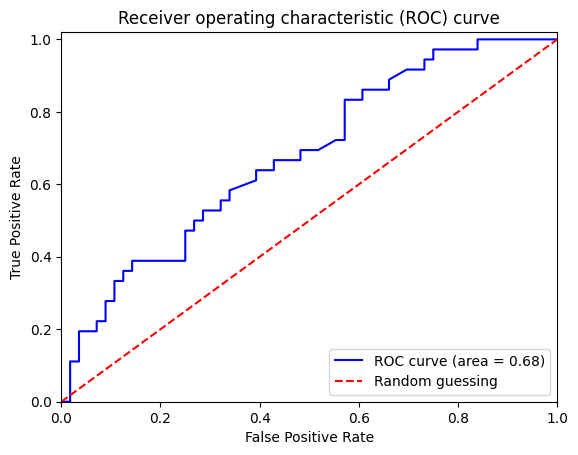

In [ ]:
# Calcul de la courbe ROC et de l'aire sous la courbe (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Tracer la courbe ROC
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

L'aire sous la courbe ROC de la régression logistique est de 0.67, cela signifie que le modèle a une performance moyenne pour la classification de la variable 'join_life'

#### La courbe d'apprentissage

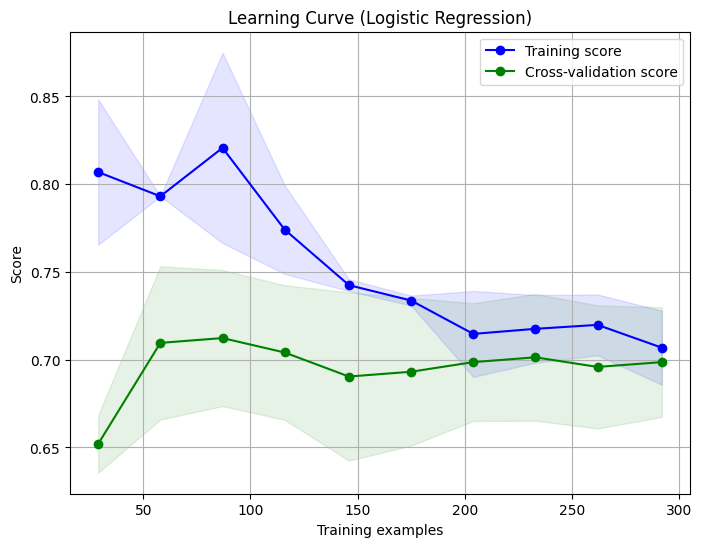

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(log_reg_final, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.title("Learning Curve (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Score")

plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="blue")

plt.plot(train_sizes, test_scores_mean, label="Cross-validation score",
                 color="green", marker='o')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="green")

plt.legend(loc="best")
plt.grid()
plt.show()


In [ ]:
print(log_reg_final.coef_)

[[ 0.03899657 -0.89518738  0.31906848  0.03606305 -0.03606305]]


## CONCLUSION:
En tant que data scientist, lors du choix du modèle dans le cadre de notre étude, nous devons prendre en compte plusieurs critères, notamment la compréhension, l'explication et la précision prédictive du modèle. En se basant sur les résultats et les caractéristiques des différents modèles utilisés, voici pourquoi nous pourrions choisir le SVM :

1. Compréhension et explication :
   - Le SVM est un modèle relativement simple et intuitif, ce qui facilite sa compréhension et son interprétation.
   - Il fournit des coefficients (poids) associés à chaque variable prédictive, ce qui permet d'identifier les variables les plus importantes dans la prédiction de la variable cible.

2. Précision prédictive :
   - Lors de l'évaluation des modèles, nous avons examiné les mesures de précision telles que la précision, le rappel et le score F1.
   - Le SVM a montré des performances globalement bonnes avec une précision, un rappel et un score F1 raisonnables pour les deux classes.
   - Bien qu'il puisse y avoir des différences de performance entre les modèles, le SVM a obtenu des résultats compétitifs par rapport aux autres modèles, ce qui suggère qu'il peut fournir des prédictions précises.

3. Gestion du surajustement (overfitting) :
   - Lors de l'évaluation des modèles, nous avons également tenu compte de la capacité des modèles à gérer le surajustement.
   - Le SVM est connu pour sa capacité à gérer le surajustement grâce à la maximisation de la marge entre les classes.
   - Les résultats de la matrice de confusion et du rapport de classification du SVM suggèrent qu'il est moins susceptible de surajuster les données par rapport à d'autres modèles.

En conclusion, le SVM présente plusieurs avantages dans notre étude en termes de compréhension, d'explication et de précision prédictive. Il offre une bonne compréhension des relations entre les variables prédictives et la variable cible, fournit des coefficients interprétables et a montré de bonnes performances prédictives. De plus, sa capacité à gérer le surajustement renforce son attrait en tant que modèle adapté pour notre étude.